<a href="https://colab.research.google.com/github/spiky-ganglia/action-selection/blob/master/Action_Selection_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Moment-to-Moment Action Selection NeuroMatch Dataset provided by Jeffrey Markowitz
by email July 22, 2020 \\
re: [The Striatum Organizes 3D Behavior via Moment-to-Moment Action Selection](https://www.cell.com/cell/pdf/S0092-8674(18)30512-9.pdf)

In [ ]:
# clone github repository only when starting or restarting notebook
!git clone https://github.com/spiky-ganglia/action-selection.git

Cloning into 'action-selection'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 27 (delta 9), reused 12 (delta 3), pack-reused 0
Unpacking objects: 100% (27/27), done.


### Jeffrey's notebook

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext nb_black

In [ ]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
use_file = '/content/action-selection/data/neuromatch_export.h5'

In [ ]:
def printall(name, obj):
    print(name, dict(obj.attrs))

In [ ]:
with h5py.File(use_file, "r") as f:
    # each session is mapped to a uuid
    uuids = list(f.keys())
    
    # print the attributes for a single dataset
    f[uuids[0]].visititems(printall) 
    
    # load in the data for the first session
    dspn_dff = f[uuids[0]]["dspn_dff"][()].ravel()
    ispn_dff = f[uuids[0]]["ispn_dff"][()].ravel()
    timestamps = f[uuids[0]]["timestamps"][()].ravel()
    syllables = f[uuids[0]]["syllables"][()].ravel()

date {'description': 'date of session', 'dtype': 'string'}
dspn_dff {'description': 'df/f for dspns (RCaMP)', 'dtype': 'single'}
ispn_dff {'description': 'df/f for ispns (GCaMP)', 'dtype': 'single'}
mouse_id {'description': 'ID of mouse', 'dtype': 'string'}
syllables {'description': 'Syllable labels (sorted by usage)', 'dtype': 'int16'}
timestamps {'description': 'timestamps in seconds', 'dtype': 'single'}


In [ ]:
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

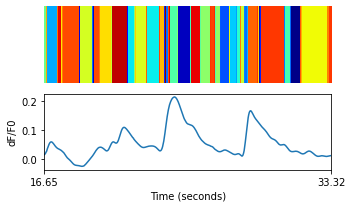

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5, 3), sharex=True)
plt_pts = slice(500, 1000)
ax[0].imshow(np.tile(syllables[plt_pts], [100, 1]), aspect="auto", cmap=cmap)
ax[0].axis("off")
ax[1].plot(ispn_dff[plt_pts])
ax[1].set_xticks((0, (plt_pts.stop - plt_pts.start)))
ax[1].set_xticklabels(np.around(timestamps[[plt_pts.start, plt_pts.stop]], 2))
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("dF/F0")
plt.tight_layout()

### resources

link | what it's for
--- | ---
[Python and HDF5](https://docs.google.com/viewer?a=v&pid=sites&srcid=b2JqZWN0bWFnZS5jb218cHJpdmF0ZS10cmFpbmluZ3xneDoyNWIzNmI3YWFhOTFmMjU2) | h5py info in book format
[seaborn introduction](https://seaborn.pydata.org/introduction.html) | seaborn introduces itself
[Offical seaborn tutorial](https://seaborn.pydata.org/tutorial.html#tutorial) | by Michael Waskom (also course reviewer for Neuromatch Academy courses)
[Pandas tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) | Pandas' reference to various tutorials and getting started guides



### data analysis

In [ ]:
import pandas as pd
import seaborn as sns
